### Model Training
#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn, Scipy, Statsmodels, Sklearn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [5]:
x_monthly = pd.read_csv(r'C:\House_price\notebook\data\x_monthly_data.csv', index_col='date')

x_monthly.index = pd.to_datetime(x_monthly.index).normalize()
x_monthly.head()

,spend,permits,permit_val,starts,completions,manufactured,new_for_sale,months_supply,emratio,pop_level,...,pm_save,consump_durable,new_sold,hp_idx,rent_vacancy,owner_vacancy,week_earning,delinquent_rate,hor,hp_idx_qtr
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,353065,1277,9982.312,1268,1262.0,304,310,4.3,64.6,211410,...,358.9,908.6,873,100.551,7.900000,1.600000,603.000000,1.950000,67.100000,101.338667
2000-02-01,351933,1241,11363.143,1255,1326.0,291,305,4.3,64.6,211576,...,324.3,930.7,856,101.339,7.933333,1.566667,604.000000,1.960000,67.133333,102.117222
2000-03-01,353452,1253,15373.755,1313,1312.0,287,310,4.3,64.6,211772,...,311.8,923.3,900,102.126,7.966667,1.533333,605.000000,1.970000,67.166667,102.895778
2000-04-01,356188,1192,14128.141,1275,1307.0,271,299,4.4,64.7,212018,...,347.8,900.6,841,102.922,8.000000,1.500000,606.000000,1.980000,67.200000,103.674333
2000-05-01,349907,1182,15639.629,1230,1334.0,265,302,4.4,64.4,212242,...,351.1,907.0,857,103.677,8.066667,1.533333,607.666667,2.016667,67.366667,104.378333


The key points in a simplified and bullet-point format:

- **Data Analysis Findings**: We noticed a significant change in data patterns starting in the year 2020.
- **Unusual Data Distribution**: The data after 2020 appears different and is characterized by a unique distribution.
- **Pandemic Impact**: This shift is primarily attributed to the COVID-19 pandemic, which introduced exceptional factors beyond typical socioeconomic ones.
- **Modeling Challenges**: Previous attempts to create models for the post-2020 period were unsuccessful due to the distinct nature of this data.
- **Successful Modeling**: In contrast, our models effectively capture the effects of the 2008 recession.
- **Focus Period**: To maintain consistency and account for data reliability, we will limit our analysis to the period - from January 1, 2000, to December 1, 2019.

##### Preparing X and Y variables

In [6]:
# Truncate the 'x_monthly' DataFrame to include data only up to December 1, 2019, and reset the index.
x_monthly = x_monthly[:'2019-12-1'].reset_index()

# Create the 'y_monthly' variable by selecting the 'hp_idx' column.
y_monthly = x_monthly['hp_idx']

# Drop the 'date' and target variables ('hp_idx' and 'hp_idx_qtr') from 'x_monthly'.
x_monthly.drop(['date', 'hp_idx', 'hp_idx_qtr'], axis=1, inplace=True)

# Display the first few rows of the modified 'x_monthly' DataFrame.
x_monthly.head()

,spend,permits,permit_val,starts,completions,manufactured,new_for_sale,months_supply,emratio,pop_level,...,fed_fund_rate,disp_income,pm_save,consump_durable,new_sold,rent_vacancy,owner_vacancy,week_earning,delinquent_rate,hor
0,353065,1277,9982.312,1268,1262.0,304,310,4.3,64.6,211410,...,3.99,9309.1,358.9,908.6,873,7.900000,1.600000,603.000000,1.950000,67.100000
1,351933,1241,11363.143,1255,1326.0,291,305,4.3,64.6,211576,...,5.79,9345.2,324.3,930.7,856,7.933333,1.566667,604.000000,1.960000,67.133333
2,353452,1253,15373.755,1313,1312.0,287,310,4.3,64.6,211772,...,5.78,9370.3,311.8,923.3,900,7.966667,1.533333,605.000000,1.970000,67.166667
3,356188,1192,14128.141,1275,1307.0,271,299,4.4,64.7,212018,...,6.17,9418.3,347.8,900.6,841,8.000000,1.500000,606.000000,1.980000,67.200000
4,349907,1182,15639.629,1230,1334.0,265,302,4.4,64.4,212242,...,6.17,9457.3,351.1,907.0,857,8.066667,1.533333,607.666667,2.016667,67.366667


In [7]:
y_monthly.head()

0    100.551
1    101.339
2    102.126
3    102.922
4    103.677
Name: hp_idx, dtype: float64

In [8]:
# Split the 'x_monthly' and 'y_monthly' datasets into training and testing sets.
# 'test_size=0.20' indicates that 20% of the data will be used for testing, while 80% will be used for training.
# 'shuffle=False' ensures that the data is not randomly shuffled before splitting, maintaining the chronological order.
# 'stratify=None' means that there's no stratification based on any specific variable.
xm_train, xm_test, ym_train, ym_test = train_test_split(x_monthly, y_monthly, test_size=0.20, shuffle=False, stratify=None,random_state=22)

In [9]:
print(xm_train.shape)
print(xm_test.shape)
print(ym_train.shape)
print(ym_test.shape)

(201, 22)
(51, 22)
(201,)
(51,)


#### Scaling the Input datapoints

In [10]:
## scale data

scaler = StandardScaler()
scaler.fit(xm_train)

xm_train_sc = scaler.transform(xm_train)
xm_test_sc = scaler.transform(xm_test)

In [11]:
print(xm_train_sc.shape)
print(xm_test_sc.shape)

(201, 22)
(51, 22)


In [12]:
xm_train_df = pd.DataFrame(xm_train_sc, columns=xm_train.columns)

xm_test_df = pd.DataFrame(xm_test_sc, columns=xm_test.columns)

Given that most features in the exploratory data analysis (EDA) are not normally distributed, the decision to standardize the data, which transforms it to have a mean of 0 and a standard deviation of 1, is a suitable choice. Standardization is robust to non-normally distributed data and is particularly useful when features have varying scales.

#### Linear Regression

In [13]:
# This predefined function for model evaluation

def evaluate(model, x_test, y_test):
    pred = model.predict(x_test)
    r2 = metrics.r2_score(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

    print(f"R2 score: {r2}")
    print(f"RMSE: {rmse}")
    
    print(f"RMSE / mean(house_price_index): {rmse/np.mean(y_test)}")
    print('\n')

Insights
* This code defines an evaluation function for a machine learning model. It computes and prints the R-squared (R2) score, Root Mean Square Error (RMSE), and the ratio of RMSE to the mean of the target variable 'house_price_index' to assess the model's performance on the given test data. The R2 score measures the model's goodness of fit, RMSE quantifies prediction errors, and the ratio indicates how RMSE compares to the average target value.

In [14]:
lin_reg = LinearRegression()

lin_reg.fit(xm_train_df, ym_train)

LinearRegression()

In [15]:
# Evaluate the model
print('>>>>>>>> On Train Data --->\n')

evaluate(lin_reg, xm_train_df, ym_train)


print('>>>>>>>>> On Test Data --->\n')

evaluate(lin_reg, xm_test_df, ym_test)

>>>>>>>> On Train Data --->

R2 score: 0.9967101546191554
RMSE: 1.3505935405134415
RMSE / mean(house_price_index): 0.009204759295050737


>>>>>>>>> On Test Data --->

R2 score: 0.8581021251486862
RMSE: 4.476775212387969
RMSE / mean(house_price_index): 0.022972776428998268




Insights

The Output of above Linear Regression model in Training and Testing
1. **On Train Data:**
   - High R-squared (0.997) indicates a strong fit, explaining most of the training data's variance.
   - Low RMSE (1.351) suggests small prediction errors on the training set.
   - The RMSE-to-mean ratio (0.0092) signifies that model errors are tiny compared to the average house price index.

2. **On Test Data:**
   - Slightly lower R-squared (0.858) suggests a good but slightly reduced fit on the test data.
   - RMSE (4.477) indicates somewhat larger prediction errors compared to the training set.
   - RMSE-to-mean ratio (0.023) shows that test data prediction errors remain relatively small relative to the average house price index.

### Feature Elimination

simple way of feature elimination based on P-values:

- **High Collinearity Identified:**
  - In EDA, strong correlations between features were observed, suggesting potential redundancy.

- **P-Value-Guided Selection:**
  - Rather than directly removing correlated features, a linear regression model is used to assess each feature's significance via P-values.
  
- **Iterative Process:**
  - Features with P-values exceeding a threshold (typically 0.05) are progressively removed in iterations.
  
- **Performance Evaluation:**
  - Model performance, indicated by R-squared (R2) and Prob(F-statistic), is monitored throughout.
  
- **Statsmodels OLS Used:**
  - Statsmodels Ordinary Least Squares (OLS) simplifies this process by providing detailed summaries with P-values, R2, and F-statistic p-values.

This method systematically refines the feature set while maintaining overall model quality.

In [16]:
# Function to fit Ordinary Least Squares (OLS) linear regression model and print summary statistics
def fit_ols(x, y):
    # Add an intercept term to the feature matrix
    x_sm = sm.add_constant(x)
    
    # Fit the Ordinary Least Squares (OLS) model
    lm = sm.OLS(y, x_sm).fit()
    
    # Print summary statistics of the OLS model
    print(lm.summary())
    
    return lm

# Function to calculate and print Variance Inflation Factor (VIF) for each feature
def print_vif(df):
    # Create a DataFrame to store feature names and their VIF values
    df_vif = pd.DataFrame()
    df_vif['Features'] = df.columns
    df_vif['VIF'] = [round(variance_inflation_factor(df.values, k), 2) for k in range(df.shape[1])]
    
    # Print the VIF values sorted by descending order
    print(df_vif.sort_values(by='VIF', ascending=False))

# Function to drop specified columns from a DataFrame
def drop_cols(cols, df):
    # Drop the specified columns from the DataFrame 'df'
    df.drop(cols, axis=1, inplace=True)


In [17]:
fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2451.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          1.61e-208
Time:                        17:21:41   Log-Likelihood:                -345.62
No. Observations:                 201   AIC:                             737.2
Df Residuals:                     178   BIC:                             813.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7277      0.101   14

Insights
- The 'completions' column exhibits a high P-value, suggesting that it likely doesn't significantly contribute to our model, with a confidence level of approximately 95%. As a next step, I will iteratively repeat this process for other columns in a systematic way.

In [18]:
# Drop multiple features from the DataFrame 'xm_train_df'
cols_to_drop = ['completions', 'manufactured', 'rent_vacancy','permit_val','months_supply','new_sold','mortgage_rate']
drop_cols(cols_to_drop, xm_train_df)

In [19]:
xm_train_df.columns

Index(['spend', 'permits', 'starts', 'new_for_sale', 'emratio', 'pop_level',
       'gdp', 'fed_fund_rate', 'disp_income', 'pm_save', 'consump_durable',
       'owner_vacancy', 'week_earning', 'delinquent_rate', 'hor'],
      dtype='object')

In [20]:
lm = fit_ols(xm_train_df, ym_train)
print_vif(xm_train_df)

                            OLS Regression Results                            
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3597.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.95e-219
Time:                        17:21:44   Log-Likelihood:                -349.42
No. Observations:                 201   AIC:                             730.8
Df Residuals:                     185   BIC:                             783.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7277      0.101   14

Insights
- The above OLS regresion we used to remove the Highly correlated features
- I am finding the P < 0.05 will be NOT useful for our Machine learning model building
- As we can see R2 and R2-adjusted values are close to the original values with all features.

- P-value for all featues < 0.05

- Prob(F-statistic) is very low, which is great, as it means our model is learning

Condition No. is high, which suggests that data is multicollinear, also VIF values suggest the same!

### Evaluate The Test data

In [21]:
xm_test_df1 = sm.add_constant(xm_test_df)  # add constant column

evaluate(lin_reg, xm_test_df, ym_test)

R2 score: 0.8581021251486862
RMSE: 4.476775212387969
RMSE / mean(house_price_index): 0.022972776428998268




Insights
- Both test R2 scores and RMSE are better compared to the model trained with full features !

Impact of Features on House Prices
- We can use our regressor's summary to understand how the features affect home prices

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hp_idx   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3597.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.95e-219
Time:                        17:21:49   Log-Likelihood:                -349.42
No. Observations:                 201   AIC:                             730.8
Df Residuals:                     185   BIC:                             783.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.7277      0.101   1449.942      0.000     146.528     146.927
spend               7.0053      0.981      7.143      0.000       5.070       8.940
permits             5.3676      1.551      3.462      0.001       2.309       8.427
starts             -3.1172      1.139     -2.738      0.007      -5.364      -0.871
new_for_sale        9.9036      0.917     10.806      0.000       8.095      11.712
emratio             2.5882      0.986      2.624      0.009       0.643       4.534
pop_level          22.3284      2.431      9.184      0.000      17.532      27.125
gdp                -1.7225      0.258     -6.678      0.000      -2.231      -1.214
fed_fund_rate       1.1264      0.368      3.063      0.003       0.401       1.852
disp_income        16.1417      2.277      7.089      0.000      11.649      20.634
pm_save            -5.6646      0.651     -8.700      0.000      -6.949      -4.380
consump_durable    -2.1219      0.570     -3.724      0.000      -3.246      -0.998
owner_vacancy       1.1879      0.482      2.463      0.015       0.236       2.139
week_earning       -7.4941      2.108     -3.556      0.000     -11.652      -3.336
delinquent_rate     2.0708      0.852      2.431      0.016       0.390       3.752
hor                 1.6697      0.629      2.655      0.009       0.429       2.910
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.681
Skew:                          -0.061   Prob(JB):                        0.711
Kurtosis:                       2.742   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
coef = lm.params[1:]

coef = pd.DataFrame(coef).reset_index()

coef.columns = ['feature', 'weight']

coef

,feature,weight
0,spend,7.005286
1,permits,5.367592
2,starts,-3.117177
3,new_for_sale,9.903616
4,emratio,2.588162
5,pop_level,22.328430
6,gdp,-1.722462
7,fed_fund_rate,1.126402
8,disp_income,16.141715
9,pm_save,-5.664622


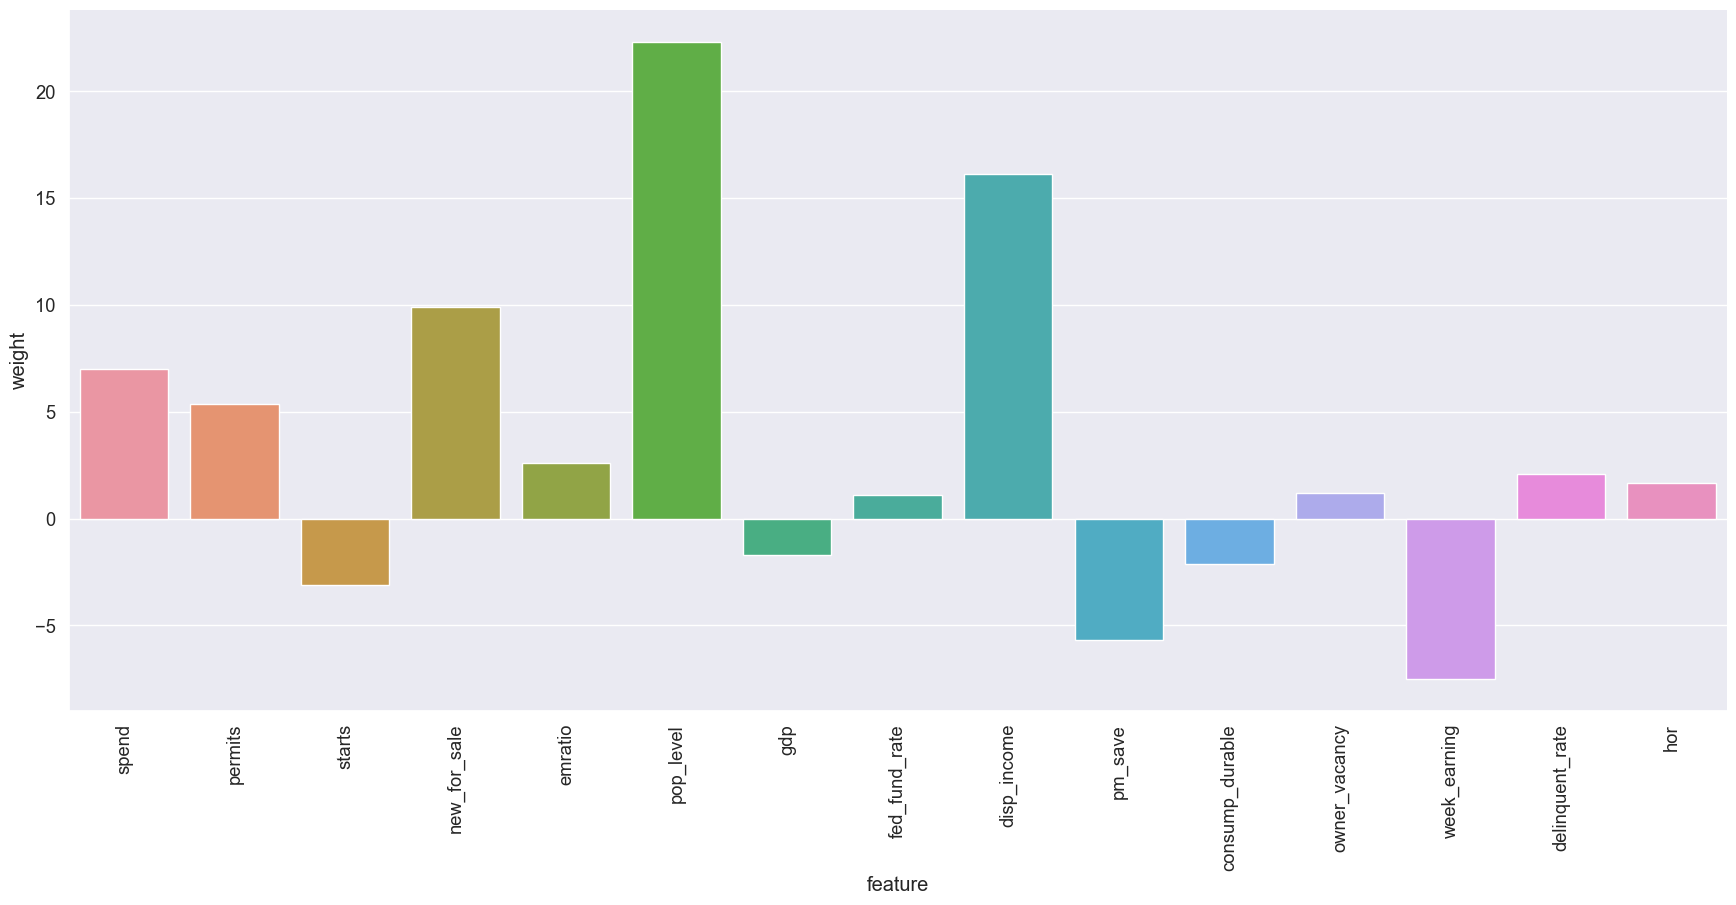

In [24]:
sns.set(font_scale=1.2)
g = sns.catplot(kind='bar', data=coef, x='feature', y='weight', height = 8, aspect = 2.2)
g.set_xticklabels(rotation=90)

Explanation of the various factors and their impacts on home prices:

1. **Spend (Spending on Construction Resources):**
   - Increased spending on construction resources, including labor and equipment, tightens the supply of housing.
   - A tighter supply tends to increase home prices because there are fewer homes available in the market.

2. **Permits (Number of Authorized Permits for Single Households):**
   - A higher number of authorized permits for single households typically has a positive impact on house prices.
   - This suggests that when there's an increase in permits, it often reflects growth in the housing market, leading to higher prices.

3. **Starts (New Construction Starts):**
   - The number of new construction starts can impact supply.
   - An increase in new construction starts contributes to a greater housing supply, which can lead to a decrease in home prices.

4. **New_for_sale (Number of Households Available for Sale):**
   - More households available for sale often result from increased demand.
   - This increased demand can lead to higher prices as buyers compete for available homes.

5. **Emratio (Population Employment Ratio):**
   - The employment ratio, indicating the percentage of the population employed, positively influences demand.
   - A higher employment ratio tends to drive up demand for housing, thereby contributing to higher home prices.

6. **Pop_level (Population):**
   - A larger population positively affects housing demand.
   - With more people in an area, there is increased demand for housing, which can lead to higher prices.

7. **GDP (Gross Domestic Product):**
   - The model suggests that GDP has a negative impact on house prices.
   - This could be because an increase in GDP may imply higher production in the construction industry, leading to an increase in housing supply and a decrease in prices.

8. **Fed_fund_rate (Federal Funds Rate):**
   - The Federal Funds Rate, which affects interest rates, has a slight positive impact on house prices.
   - As the Fed rates increase, mortgage rates can rise, making housing purchases more expensive and potentially increasing the perceived value of homes.

9. **Disp_income (Disposable Income):**
   - Disposable income, the income left after taxes, positively contributes to buying power.
   - Higher disposable income can increase the ability to purchase homes, which in turn can lead to higher prices.

10. **Pmsave (Personal Savings):**
    - Personal savings can negatively impact demand for housing.
    - When people save more and are less willing to invest in buying a house, it can reduce housing demand, leading to lower prices.

11. **Hor (Home Ownership Rate):**
    - The home ownership rate serves as a measure of housing demand.
    - An increasing ownership rate indicates higher demand for homes, potentially leading to higher prices.

12. **Delinquent_rate (Delinquency Rate):**
    - The delinquency rate, indicating debt past due, has a positive impact on prices.
    - This suggests that areas with higher delinquency rates may see higher home prices, possibly due to increased demand.

13. **Owner_vacancy (Owner Vacancy Rate):**
    - A higher owner vacancy rate can suggest better demand and higher prices.
    - A lower vacancy rate implies greater demand for housing, potentially increasing prices.

14. **Week_earning (Weekly Earnings):**
    - Weekly earnings contribute to lower home prices, as indicated by the model.
    - Factors that positively impact home prices, such as permits and employment ratio, tend to correlate negatively with weekly earnings.
    - This suggests that higher weekly earnings may lead to increased savings rather than housing investments.

15. **Consump_durable (Expenditure on Durable Goods):**
    - Expenditure on durable goods has a negative impact on house prices, similar to weekly earnings.
    - It tends to correlate positively with opposing factors (such as savings) and negatively with factors like home ownership rate.
    - This implies that increased spending on durable goods may reduce housing demand and, consequently, prices.

These factors collectively illustrate the complex interplay between supply, demand, economic indicators, and consumer behavior in influencing home prices.

#### Other features
- These are the features that were removed, however we can still extract their coefficients from the full feature model.
- However as we know the contribution of these extra features is accounted for by the previous ones.

In [25]:
pd.DataFrame(lin_reg.coef_, columns=['weight'], index=xm_train.columns)


,weight
spend,6.138604
permits,5.891702
permit_val,-0.275815
starts,-2.868615
completions,0.056381
manufactured,0.107175
new_for_sale,9.440311
months_supply,0.487985
emratio,2.763267
pop_level,23.880089


Explanation of the additional factors and their impacts on home prices:

1. **Completions (Completion of Construction):**
   - The completion of construction has a positive impact on demand for homes.
   - As more construction projects are completed, they add to the housing supply, meeting the demand and potentially contributing to higher home prices.

2. **Manufactured (Manufactured Homes):**
   - The presence of manufactured homes also positively influences housing demand and prices.
   - Manufactured homes contribute to the overall supply of housing, catering to various preferences and budgets.

3. **Mortgage_rate (Mortgage Interest Rates):**
   - Higher mortgage interest rates are associated with higher home prices.
   - This relationship may be due to increased demand as people rush to secure mortgages before rates rise further, potentially driving up prices.

4. **New_sold (New Houses Sold):**
   - The number of new houses sold reflects buying power and positively contributes to higher home prices.
   - Increased sales of new homes often indicate strong demand, potentially leading to price appreciation.

5. **Rent_vacancy (Rental Vacancy Rate):**
   - Rental properties serve as alternatives to homeownership and can influence housing demand.
   - A higher rental vacancy rate suggests a surplus of rental units, which may decrease demand for home purchases and, in turn, home prices.

6. **Permit_value (Permit Value):**
   - Permit value represents the total value of construction projects submitted by owners.
   - A higher permit value often contributes to higher home prices as it indicates increased construction activity, potentially expanding the housing supply.

7. **Months_supply (Months' Supply):**
   - Months' supply refers to the time it would take to sell the existing inventory of homes based on current sales pace.
   - A positive correlation with home prices suggests that when months' supply is lower, indicating a faster rate of home sales relative to available inventory, it can lead to higher prices.